# PPI prediction for DM2 network

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score, matthews_corrcoef, f1_score
from sklearn.model_selection import cross_val_score
import logging
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
from scipy.stats import ttest_ind
import scipy.stats  as stats
import networkx as nx
from joblib import dump, load
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedShuffleSplit
import pickle
import xgboost as xgb
#print(sklearn.__version__)
import import_ipynb
from PPI_functions import *
network_name='DM2'


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


1.25.2
1.4.4
3.9.15 (main, Nov 24 2022, 08:29:02) 
[Clang 14.0.6 ]
importing Jupyter notebook from PPI_functions.ipynb
1.25.2
1.4.4
3.9.15 (main, Nov 24 2022, 08:29:02) 
[Clang 14.0.6 ]


## source of data
## https://github.com/mlbioinfolab/ppi-metago/blob/master/protein_pair/EC2/EC2_pair.txt

## publication: https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-019-2907-1

In [2]:
#path_h="/Users/temih/Dropbox/PPI_similarity_new/data/"   # windows
path_h="/Users/hamidteimouri/Dropbox/PPI_similarity_new/data/" # mac


# Step0: Visualization of the network

In [3]:
#G4=network_vis('EC2',path_h)
#!pip install xgboost scikit-learn


# Step 1: Feature extraction using propy


#Descriptors_complete('EC2_sequence_fasta.txt','EC2_descriptors.csv')

# Step 2: Calculate PP distance

In [4]:
# distance_PP('EC2')

# Step 3: Upload data and train/test spilit

In [5]:
X,y,klist,df3=load_network_data(network_name, path_h)



In [6]:
ns = 15
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)

# Step 4: Train logistic and SVM models using all features

In [7]:
all_features_traning_results = models_crossval(Xtrain_cv,Ytrain_cv,ns)


In [8]:
all_features_traning_results

{'average logistic regression accuracy:': 0.9850552306692656,
 'average SVM accuracy:': 0.9359324236517218,
 'average logistic regression recall:': 0.9850544139105059,
 'average SVM recall:': 0.9359248338197148,
 'average logistic regression matthews_corrcoef:': 0.970158957248678,
 'average SVM matthews_corrcoef:': 0.8724704378998573,
 'average logistic regression f1 score:': 0.970158957248678,
 'average SVM f1 score:': 0.8724704378998573}

In [9]:

## Save dat into pickle file
data_save = {}
data_save['all_features_traning_results']=all_features_traning_results

## now we check if model overfits

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
# Your initial setup
ns=5
Y = y
cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
fold_num=0
# Splitting
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    # Now you have a train-test split, you can proceed with your analysis
    # For instance, 
    fold_num += 1  # Increment the fold counter
    print('Processing cross validation for fold:', fold_num)
    results = models_overfitting(X_train, Y_train, X_test, Y_test)


Processing cross validation for fold: 1
Logistic Regression train_accuracy: 0.9864
Logistic Regression test_accuracy: 0.6744
Logistic Regression train_recall: 0.9864
Logistic Regression test_recall: 0.6745
Logistic Regression train_mcc: 0.9727
Logistic Regression test_mcc: 0.3491
Logistic Regression train_f1: 0.9864
Logistic Regression test_f1: 0.6769


SVC train_accuracy: 0.9376
SVC test_accuracy: 0.6822
SVC train_recall: 0.9376
SVC test_recall: 0.6822
SVC train_mcc: 0.8757
SVC test_mcc: 0.3644
SVC train_f1: 0.9387
SVC test_f1: 0.6822


Processing cross validation for fold: 2
Logistic Regression train_accuracy: 0.9883
Logistic Regression test_accuracy: 0.7364
Logistic Regression train_recall: 0.9883
Logistic Regression test_recall: 0.7369
Logistic Regression train_mcc: 0.9766
Logistic Regression test_mcc: 0.4770
Logistic Regression train_f1: 0.9883
Logistic Regression test_f1: 0.7213


SVC train_accuracy: 0.9357
SVC test_accuracy: 0.7209
SVC train_recall: 0.9357
SVC test_recall: 0.721

# Step 5: Feature Selection Using Lasso Regression

In [11]:
AA=0.004
ns = 15
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)
featuredict_lasso = lasso_feature_selection(Xtrain_cv,Ytrain_cv,AA,ns,klist)
featuredict_lasso

NS -0.10166505672048223
QK -0.13934482925220634
QP -0.14070762129700018
HY -0.30712444578012565
MV -0.11562115521871429
WD -0.09444582277596651
MoranAuto_Polarizability30 0.2636093984737008
GearyAuto_Mutability20 0.07377700142878739
_PolarizabilityD3001 -0.1366881799225751
_PolarityD1001 -0.015259991281056996
PAAC6 -0.3090853764059061
PAAC22 -0.26973516791832985
APAAC4 -0.27399710840535846
APAAC13 -0.2110992428755867
APAAC16 -0.16708668161794224
tausw38 -0.1818695726760565


{'NS': -0.10166505672048223,
 'QK': -0.13934482925220634,
 'QP': -0.14070762129700018,
 'HY': -0.30712444578012565,
 'MV': -0.11562115521871429,
 'WD': -0.09444582277596651,
 'MoranAuto_Polarizability30': 0.2636093984737008,
 'GearyAuto_Mutability20': 0.07377700142878739,
 '_PolarizabilityD3001': -0.1366881799225751,
 '_PolarityD1001': -0.015259991281056996,
 'PAAC6': -0.3090853764059061,
 'PAAC22': -0.26973516791832985,
 'APAAC4': -0.27399710840535846,
 'APAAC13': -0.2110992428755867,
 'APAAC16': -0.16708668161794224,
 'tausw38': -0.1818695726760565}

In [12]:
data_save['selected_features_lasso']=featuredict_lasso

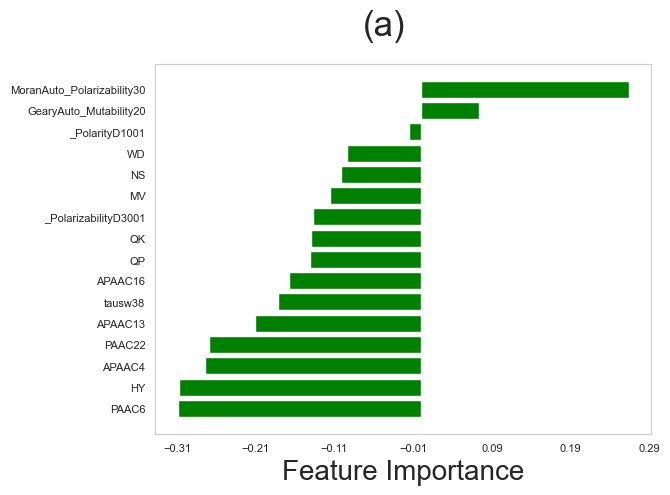

In [13]:

sorted_dict = sorted(featuredict_lasso.items(), key=lambda x: x[1])
# Get the 10 highest positive keys
positive_keys = dict(sorted_dict[-8:])
# Get the 10 lowest negative keys
negative_keys = dict(sorted_dict[:8])
# Create a new dictionary containing the selected keys
new_dict = {**positive_keys, **negative_keys}
featuredict=new_dict
dr=0.1
selected_features_plotter(featuredict,network_name,'lasso',20,dr)


## Now we train model using features selection from LASSO mothod

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
# Your initial setup
ns=10
scaled_features_df=df3
mean_accu_log=0
mean_accu_svm=0
mean_recall_log=0
mean_recall_svm=0
mean_mcc_log=0
mean_mcc_svm=0
mean_f1_log=0
mean_f1_svm=0
cols=list(featuredict_lasso.keys())
XX=np.array(scaled_features_df[cols])
cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
fold_num=0
# Splitting
for train_index, test_index in cv.split(XX, y):
    X_train, X_test = XX[train_index], XX[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    # Now you have a train-test split, you can proceed with your analysis
    # For instance, 
    fold_num += 1  # Increment the fold counter
    print('Processing cross validation for fold:', fold_num)
    #results = models_overfitting2(X_train, Y_train, X_test, Y_test)
    #... rest of your code
    results = models_overfitting(X_train, Y_train, X_test, Y_test)
    mean_accu_log = mean_accu_log + results['logistic_regression']['test_accuracy']
    mean_accu_svm = mean_accu_svm + results['svc']['test_accuracy']
    mean_recall_log = mean_recall_log + results['logistic_regression']['test_recall']
    mean_recall_svm = mean_recall_svm + results['svc']['test_recall']
    mean_mcc_log = mean_mcc_log + results['logistic_regression']['test_mcc']
    mean_mcc_svm = mean_mcc_svm + results['svc']['test_mcc']
    mean_f1_log = mean_f1_log + results['logistic_regression']['test_f1']
    mean_f1_svm = mean_f1_svm + results['svc']['test_f1']
    
print('mean accuracy for log regression is' , mean_accu_log/ns)
print('mean accuracy for svm is' , mean_accu_svm/ns)
print('mean recall for log regression is' , mean_recall_log/ns)
print('mean recall for svm is' , mean_recall_svm/ns)
print('mean mcc for log regression is' , mean_mcc_log/ns)
print('mean mcc for svm is' , mean_mcc_svm/ns)
print('mean f1 for log regression is' , mean_f1_log/ns)
print('mean f1 for svm is' , mean_f1_svm/ns)

Processing cross validation for fold: 1
Logistic Regression train_accuracy: 0.7368
Logistic Regression test_accuracy: 0.7132
Logistic Regression train_recall: 0.7368
Logistic Regression test_recall: 0.7136
Logistic Regression train_mcc: 0.4741
Logistic Regression test_mcc: 0.4293
Logistic Regression train_f1: 0.7429
Logistic Regression test_f1: 0.7259


SVC train_accuracy: 0.8382
SVC test_accuracy: 0.7364
SVC train_recall: 0.8382
SVC test_recall: 0.7367
SVC train_mcc: 0.6764
SVC test_mcc: 0.4740
SVC train_f1: 0.8382
SVC test_f1: 0.7424


Processing cross validation for fold: 2
Logistic Regression train_accuracy: 0.7368
Logistic Regression test_accuracy: 0.7054
Logistic Regression train_recall: 0.7369
Logistic Regression test_recall: 0.7053
Logistic Regression train_mcc: 0.4742
Logistic Regression test_mcc: 0.4109
Logistic Regression train_f1: 0.7419
Logistic Regression test_f1: 0.7121


SVC train_accuracy: 0.8226
SVC test_accuracy: 0.7287
SVC train_recall: 0.8226
SVC test_recall: 0.729

In [15]:
scaled_features_df=df3
cols=list(featuredict_lasso.keys())
XX=np.array(scaled_features_df[cols])
i = 0
from sklearn.model_selection import StratifiedShuffleSplit

Xtrain_cv = list(range(ns))
Xtest_cv = list(range(ns))
Ytrain_cv = list(range(ns))
Ytest_cv = list(range(ns))

cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
for train_index, test_index in cv.split(XX, y):
    Xtrain_cv[i] = XX[train_index]
    Xtest_cv[i] = XX[test_index]
    Ytrain_cv[i] = y[train_index]
    Ytest_cv[i] = y[test_index]
    
    i+=1
    #print(i)
    

In [16]:
# traning metrics
lasso_results = models_crossval(Xtrain_cv,Ytrain_cv,ns)
lasso_results

{'average logistic regression accuracy:': 0.7360623781676413,
 'average SVM accuracy:': 0.8284600389863547,
 'average logistic regression recall:': 0.7360606152723737,
 'average SVM recall:': 0.8284563472762647,
 'average logistic regression matthews_corrcoef:': 0.4726593033245948,
 'average SVM matthews_corrcoef:': 0.6570770467499336,
 'average logistic regression f1 score:': 0.4726593033245948,
 'average SVM f1 score:': 0.6570770467499336}

In [17]:
data_save['lasso_results']=lasso_results

# Step 7: Feature Selection Using Support Vector Machine

In [29]:
ns = 15
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)

In [30]:

CC = linear_SVM_grid_search(X,y,ns)
#CC=0.2
CC

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


0.1

In [31]:
featuredict_svm = svm_feature_selection(Xtrain_cv,Ytrain_cv,CC,ns,klist)
featuredict_svm

QP -0.238458391401155
GH 0.0676246875917195
HR 0.19691840046584294
MV -0.18401185553324942
MoranAuto_Polarizability30 0.48871524955950024
_SolventAccessibilityD3001 -0.06329544104255319
_HydrophobicityD3001 -0.06877550614150603
PAAC6 -0.6111742068996351
PAAC22 -0.419171728062442
APAAC4 -0.60622743177149
APAAC13 -0.38709182934145364
APAAC16 -0.30496247078664557


{'QP': -0.238458391401155,
 'GH': 0.0676246875917195,
 'HR': 0.19691840046584294,
 'MV': -0.18401185553324942,
 'MoranAuto_Polarizability30': 0.48871524955950024,
 '_SolventAccessibilityD3001': -0.06329544104255319,
 '_HydrophobicityD3001': -0.06877550614150603,
 'PAAC6': -0.6111742068996351,
 'PAAC22': -0.419171728062442,
 'APAAC4': -0.60622743177149,
 'APAAC13': -0.38709182934145364,
 'APAAC16': -0.30496247078664557}

In [32]:
data_save['selected_features_svm']=featuredict_svm

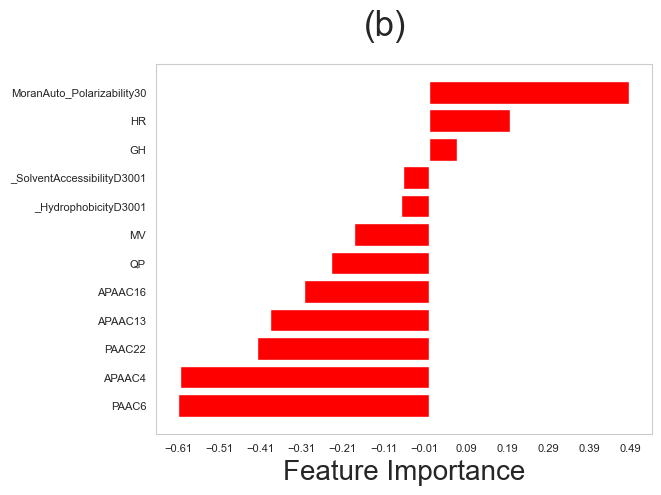

In [33]:

sorted_dict = sorted(featuredict_svm.items(), key=lambda x: x[1])
# Get the 10 highest positive keys
positive_keys = dict(sorted_dict[-8:])
# Get the 10 lowest negative keys
negative_keys = dict(sorted_dict[:8])
# Create a new dictionary containing the selected keys
new_dict = {**positive_keys, **negative_keys}
featuredict=new_dict
dr=0.1
selected_features_plotter(featuredict,network_name,'svm',20,dr)


## Training models using selected features from SVM

In [34]:
scaled_features_df=df3

cols=list(featuredict_svm.keys())
XX=np.array(scaled_features_df[cols])
i = 0
from sklearn.model_selection import StratifiedShuffleSplit

Xtrain_cv = list(range(ns))
Xtest_cv = list(range(ns))
Ytrain_cv = list(range(ns))
Ytest_cv = list(range(ns))

cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
for train_index, test_index in cv.split(XX, y):
    Xtrain_cv[i] = XX[train_index]
    Xtest_cv[i] = XX[test_index]
    Ytrain_cv[i] = y[train_index]
    Ytest_cv[i] = y[test_index]
    i+=1

In [35]:
results_svm = models_crossval(Xtrain_cv,Ytrain_cv,ns)
results_svm

{'average logistic regression accuracy:': 0.7215074723846654,
 'average SVM accuracy:': 0.7966211825860948,
 'average logistic regression recall:': 0.7215117339494165,
 'average SVM recall:': 0.7966145833333335,
 'average logistic regression matthews_corrcoef:': 0.4432704401551415,
 'average SVM matthews_corrcoef:': 0.5933841100691969,
 'average logistic regression f1 score:': 0.4432704401551415,
 'average SVM f1 score:': 0.5933841100691969}

In [36]:
data_save['results_svm']=results_svm

# check for overfitting

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit
# Your initial setup
ns=10
scaled_features_df=df3
mean_accu_log=0
mean_accu_svm=0
mean_recall_log=0
mean_recall_svm=0
mean_mcc_log=0
mean_mcc_svm=0
mean_f1_log=0
mean_f1_svm=0
cols=list(featuredict_svm.keys())
XX=np.array(scaled_features_df[cols])
cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
fold_num=0
# Splitting
for train_index, test_index in cv.split(XX, y):
    X_train, X_test = XX[train_index], XX[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    # Now you have a train-test split, you can proceed with your analysis
    # For instance, 
    fold_num += 1  # Increment the fold counter
    print('Processing cross validation for fold:', fold_num)
    #results = models_overfitting2(X_train, Y_train, X_test, Y_test)
    #... rest of your code
    results = models_overfitting(X_train, Y_train, X_test, Y_test)
    mean_accu_log = mean_accu_log + results['logistic_regression']['test_accuracy']
    mean_accu_svm = mean_accu_svm + results['svc']['test_accuracy']
    mean_recall_log = mean_recall_log + results['logistic_regression']['test_recall']
    mean_recall_svm = mean_recall_svm + results['svc']['test_recall']
    mean_mcc_log = mean_mcc_log + results['logistic_regression']['test_mcc']
    mean_mcc_svm = mean_mcc_svm + results['svc']['test_mcc']
    mean_f1_log = mean_f1_log + results['logistic_regression']['test_f1']
    mean_f1_svm = mean_f1_svm + results['svc']['test_f1']
    
print('mean accuracy for log regression is' , mean_accu_log/ns)
print('mean accuracy for svm is' , mean_accu_svm/ns)
print('mean recall for log regression is' , mean_recall_log/ns)
print('mean recall for svm is' , mean_recall_svm/ns)
print('mean mcc for log regression is' , mean_mcc_log/ns)
print('mean mcc for svm is' , mean_mcc_svm/ns)
print('mean f1 for log regression is' , mean_f1_log/ns)
print('mean f1 for svm is' , mean_f1_svm/ns)

Processing cross validation for fold: 1
Logistic Regression train_accuracy: 0.7349
Logistic Regression test_accuracy: 0.6977
Logistic Regression train_recall: 0.7349
Logistic Regression test_recall: 0.6980
Logistic Regression train_mcc: 0.4700
Logistic Regression test_mcc: 0.3969
Logistic Regression train_f1: 0.7395
Logistic Regression test_f1: 0.7068


SVC train_accuracy: 0.8090
SVC test_accuracy: 0.7054
SVC train_recall: 0.8090
SVC test_recall: 0.7056
SVC train_mcc: 0.6180
SVC test_mcc: 0.4119
SVC train_f1: 0.8108
SVC test_f1: 0.7121


Processing cross validation for fold: 2
Logistic Regression train_accuracy: 0.7173
Logistic Regression test_accuracy: 0.7287
Logistic Regression train_recall: 0.7174
Logistic Regression test_recall: 0.7286
Logistic Regression train_mcc: 0.4350
Logistic Regression test_mcc: 0.4573
Logistic Regression train_f1: 0.7217
Logistic Regression test_f1: 0.7328


SVC train_accuracy: 0.7992
SVC test_accuracy: 0.7209
SVC train_recall: 0.7992
SVC test_recall: 0.721

In [38]:
with open(network_name+'_results.pkl' , 'wb') as file:
    pickle.dump(data_save,file)

In [39]:
with open(network_name+'_results.pkl' , 'rb') as file:
    load_data=pickle.load(file)
    